In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import random
np.random.seed(10)
random.seed(10)

# Load the dataset

In [3]:
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
y = df["species"]
del df["species"]

# Compute the stability of K-means clustering

The n_init parameter of Kmeans is the "Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia."

Here, to check the stability we choose n_init=1

If the algorithm always find the same partition, then the sse and the silhouette coefficient should be the same. Otherwise these metrics will be different.

In [5]:
from sklearn.metrics import silhouette_score

In [9]:
silhouette_coef = []
sse = []
k = 6
n_init=1
for i in range(100):
    km = KMeans(n_clusters=k, n_init=n_init, random_state=i) # create a KMeans object
    km.fit(df)
    labels = km.predict(df)
    sse.append(km.inertia_)
    silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))

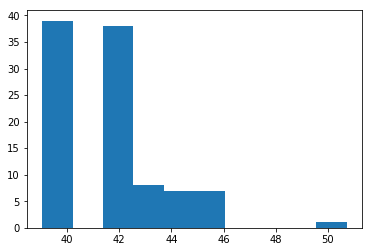

In [10]:
#_ = plt.boxplot(sse)
_ = plt.hist(sse)

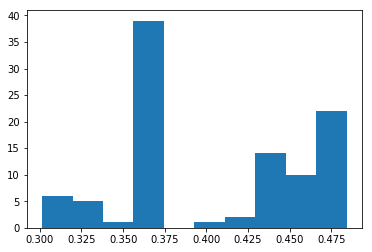

In [11]:
#_ = plt.boxplot(silhouette_coef)
_ = plt.hist(silhouette_coef)

In [12]:
silhouette_coef = []
sse = []
k = 6
n_init=20
for i in range(100):
    km = KMeans(n_clusters=k, n_init=n_init, random_state=i) # create a KMeans object
    km.fit(df)
    labels = km.predict(df)
    sse.append(km.inertia_)
    silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size = None))

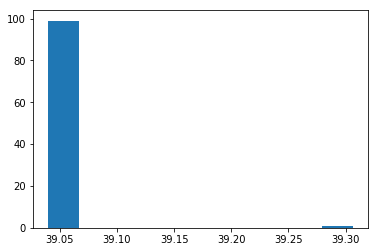

In [13]:
_ = plt.hist(sse)

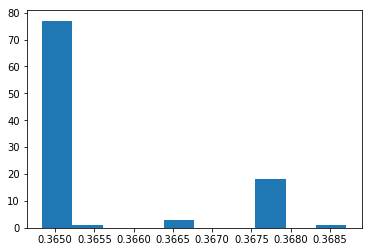

In [14]:
_ = plt.hist(silhouette_coef)

# Assess the stability for different number of clusters $k$
In this example the instability is computed through the STD of the silhouette coefficient

In [15]:
def compute_stability(k,df,iterations=100):
    silhouette_coef = []
    for i in range(iterations):
        km = KMeans(n_clusters=k, n_init=1, random_state=i) # create a KMeans object
        km.fit(df)
        labels = km.predict(df)
        silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))
    silhouette_coef = np.asarray(silhouette_coef)
    return(silhouette_coef.std())

In [16]:
stability = []
Ks = range(2,30)
for k in Ks:
    stability.append(compute_stability(k,df))

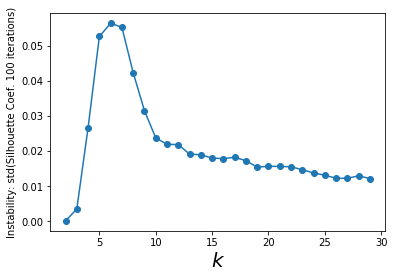

In [17]:
plt.plot(Ks,stability,"o-")
plt.xlabel("$k$",fontsize=20)
plt.ylabel("Instability: std(Silhouette Coef. 100 iterations)")